<a href="https://colab.research.google.com/github/bahadurshubham/Darknet/blob/master/Simple_linear_regression_on_california_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries to read data
import numpy as np
import pandas as pd


df = pd.read_csv('sample_data/california_housing_train.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


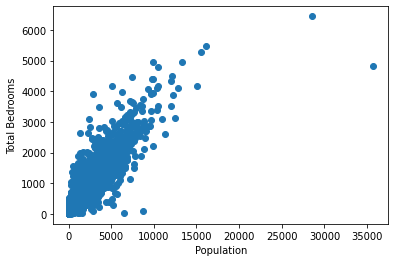

In [2]:
#importing libraries to read data which is bedrooms and total population

import matplotlib.pyplot as plt

pop = df['population']
bedrooms = df['total_bedrooms']

plt.scatter(pop, bedrooms)
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')
plt.show()

In [3]:
pop_np = pop.to_numpy()
bedrooms_np = bedrooms.to_numpy()

pop_np.shape, bedrooms_np.shape

((17000,), (17000,))

In [4]:
from sklearn.linear_model import LinearRegression

sklearn_model = LinearRegression().fit(pop_np.reshape((17000, 1)), bedrooms_np)
sklearn_bedroom_predictions = sklearn_model.predict(pop_np.reshape((17000, 1)))
sklearn_bedroom_predictions.shape

(17000,)

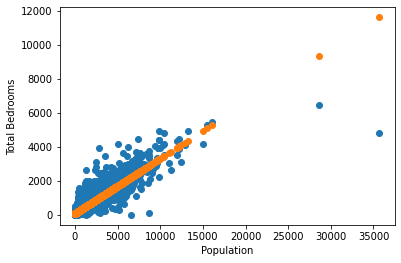

In [5]:
pop = df['population']
bedrooms = df['total_bedrooms']

plt.scatter(pop, bedrooms)
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')


plt.scatter(pop, sklearn_bedroom_predictions)

In [6]:
predictions_df = pd.DataFrame({'Population': pop,
                               'Total Bedrooms' : bedrooms,
                               'Sklearn Bedroom Predictions' : sklearn_bedroom_predictions })
predictions_df

,Population,Total Bedrooms,Sklearn Bedroom Predictions
0,1015.0,1283.0,405.266668
1,1129.0,1901.0,442.153776
2,333.0,174.0,184.591162
3,515.0,337.0,243.481106
4,624.0,326.0,278.750359
...,...,...,...
16995,907.0,394.0,370.320987
16996,1194.0,528.0,463.185899
16997,1244.0,531.0,479.364455
16998,1298.0,552.0,496.837296


In [7]:
def get_predictions(model, x):
     alpha_hat = model['alpha_hat']
     beta_hat = model['beta_hat']

     return alpha_hat + beta_hat * x
  

In [8]:
#testing get_predictions

test_model = {'alpha_hat' : 2 , 'beta_hat' : 3}
test_x = np.array([1 , 4 , 3])
get_predictions(test_model, test_x)

array([ 5, 14, 11])

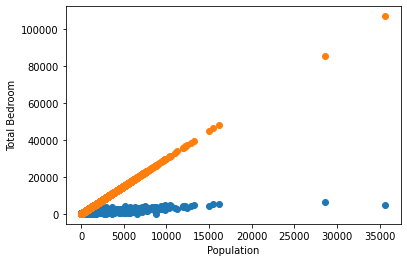

In [9]:
pop = df['population']
bedrooms = df['total_bedrooms']

plt.scatter(pop, bedrooms)
plt.xlabel('Population')
plt.ylabel('Total Bedroom')

plt.scatter(pop, get_predictions(test_model, pop_np))

In [10]:
def mean_squared_error(y, y_predictions):
  n = len(y)
  return np.sum(np.square(y-y_predictions)) / n


def mean_absolute_error(y, y_predictions):
  n = len(y)
  return np.sum(np.abs(y - y_predictions)) / n

In [11]:
mse1 = mean_squared_error(get_predictions(test_model, pop_np) , bedrooms)
mse1

23549577.56382353

In [12]:
mae1 = mean_absolute_error(get_predictions(test_model, pop_np) , bedrooms)
mae1

3751.581705882353

In [17]:
def get_best_model(x,y):
  x_bar = np.average(x)
  y_bar = np.average(y)

  top = np.sum((x - x_bar)*(y - y_bar))
  bottom = np.sum((x - x_bar)**2)
  beta_hat = top/bottom

  alpha_hat = y_bar - beta_hat * x_bar


  model = {'alpha_hat' : alpha_hat , 'beta_hat' : beta_hat}

  return model

In [18]:
best_model_np = get_best_model(pop_np, bedrooms_np)
best_model_np

{'alpha_hat': 76.84197820308827, 'beta_hat': 0.32357112283793565}

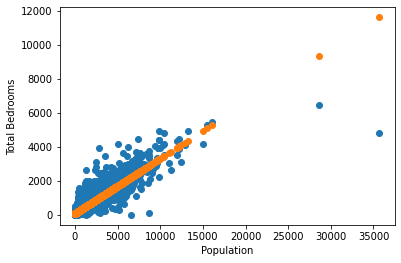

In [22]:
pop = df['population']
bedrooms = df['total_bedrooms']

plt.scatter(pop, bedrooms)
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')

plt.scatter(pop, get_predictions(best_model_np, pop_np))

In [24]:
predictions_df['Our Model Predictions'] = get_predictions(best_model_np, pop_np)
predictions_df

,Population,Total Bedrooms,Sklearn Bedroom Predictions,Our Model Predictions
0,1015.0,1283.0,405.266668,405.266668
1,1129.0,1901.0,442.153776,442.153776
2,333.0,174.0,184.591162,184.591162
3,515.0,337.0,243.481106,243.481106
4,624.0,326.0,278.750359,278.750359
...,...,...,...,...
16995,907.0,394.0,370.320987,370.320987
16996,1194.0,528.0,463.185899,463.185899
16997,1244.0,531.0,479.364455,479.364455
16998,1298.0,552.0,496.837296,496.837296
